## Supervised and Unsupervised Learning

**Supervised Learning:** We have training data where the label y is known. It is like a child learning shapes under the *supervision* of an adult.

**Unsupervised Learning:** We have training data where the label y is not known. It is like a child who has been left to learn about shapes on their own without an adult to guide them.

## Clustering

- Clustering is one type of **unsupervised** learning.
- The goal is to find groups of similar observations.

In [1]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/stats112/data/"
df_penguins = pd.read_csv(data_dir + "penguins.csv")
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's focus on just two of the variables, the bill depth and flipper length, so that we can easily visualize the data. Based on the scatterplot below, how many clusters are there in this data set? Can you devise an algorithm that would automatically identify those clusters?

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

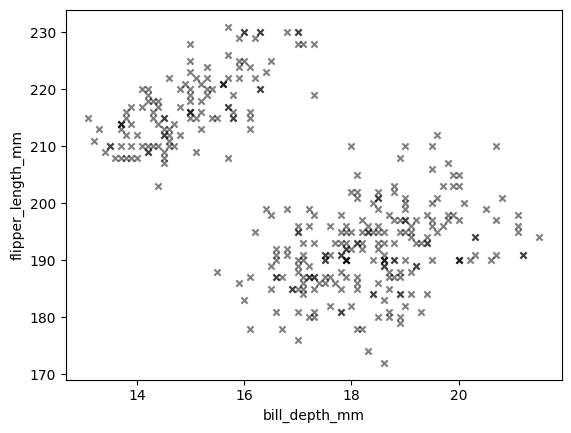

In [2]:
X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]].dropna()
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c="black", marker="x", alpha=.5)

These two variables are on very different scales, so we will need to scale them first.

In [3]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()

# Implementing K-Means from Scratch
K -means is an algorithm for finding clusters in data. The idea behind  k -means is simple: each cluster has a "center" point called the centroid, and each observation is assigned to the cluster of its nearest centroid. The challenge is finding the right centroids. The  k -means algorithm starts with a random guess for the centroids and iteratively improves them.

The steps are as follows:

1. Initialize  k  centroids at random.
2. Assign each point to the cluster of its nearest centroid.
3. (After reassignment, each centroid may no longer be at the center of its cluster.) Recompute each centroid based on the points assigned to its cluster.
4. Repeat steps 2 and 3 until no points change clusters.

First, we will implement the  k -means algorithm from scratch. First, let's sample 3 observations at random from the penguins data to serve as the initial centroids.

,bill_depth_mm,flipper_length_mm
r,0.581747,-0.420660
b,1.189406,-0.776236
y,-0.988037,1.428332


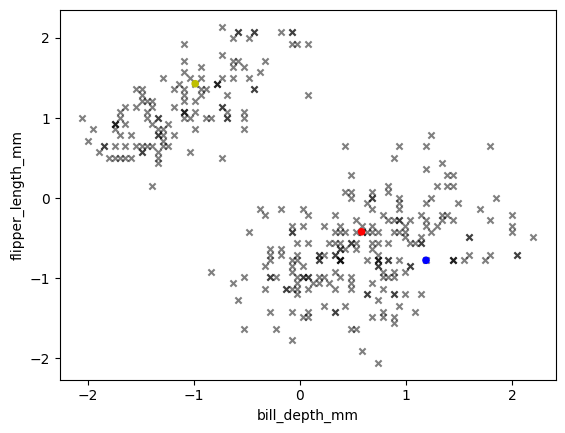

In [4]:
# Initialize 3 centroids at random from the data.
centroids = X_train_scaled.sample(3)

# Call the three clusters "red", "blue", "yellow" for convenience.
centroids.index = ["r", "b", "y"]

# Plot these centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c="black", marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

centroids

Now we assign each point to the cluster of its nearest centroid.

In [6]:
# obs: observation location 0 daki gözlemin centroide olan uzaklığını hesapla hangi centroide ait olduğunu bul.
obs = X_train_scaled.loc[0]
np.sqrt(((obs - centroids) ** 2).sum(axis=1)).idxmin() # idxmin(): the centroid with the smallest distance

'b'

In [7]:
# Finds the nearest centroid to a given observation.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train_scaled.loc[0])

'b'

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

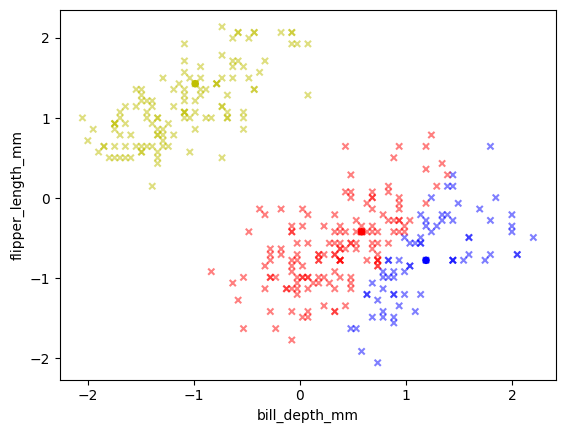

In [8]:
# Apply the function to the entire data set.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1) #1: row-wise, 0: column-wise operation

# Plot the cluster assignments.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

Notice that some of the centroids are no longer at the center of their clusters. We can fix that by redefining the centroid to be the mean of the points in its cluster.

,bill_depth_mm,flipper_length_mm
b,1.204383,-0.744184
r,0.335057,-0.604695
y,-1.098371,1.157170


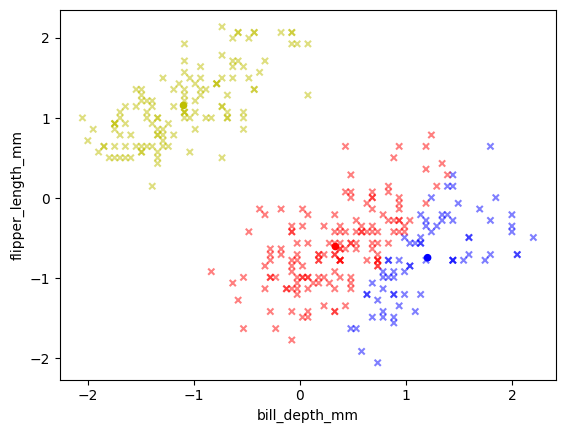

In [9]:
# Calculate the mean length and width for each cluster.
centroids = X_train_scaled.groupby(clusters).mean()

# Let's plot the new centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

centroids

Now, there may be some points that are no longer assigned to their closest centroid, so we have to go back and re-assign clusters. But that may cause the centroids to no longer be at the center of their cluster, so we have to recalculate the centroids. And so on. This process continues until the cluster assignments stop changing.

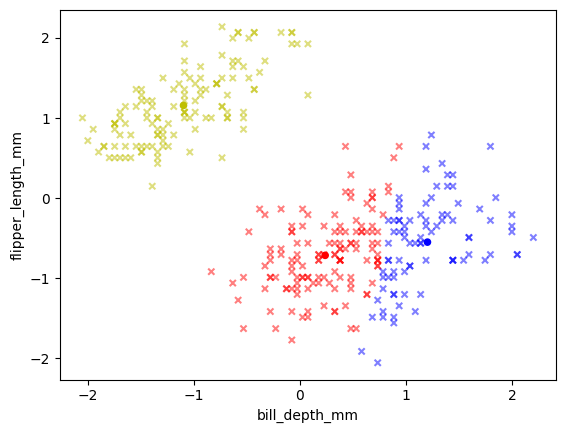

In [10]:
# Assign points to their nearest centroid.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train_scaled.groupby(clusters).mean()

# Plot the current cluster assignments and the centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax);

We can run the code in the above cell over and over until the clusters stop changing. This is the final cluster assignment.

# K-Means in scikit-learn
We rarely need to implement the k-means algorithm from scratch because it is available in scikit-learn. The API for scikit-learn's k-means model is similar to the API for supervised learning models, like k-nearest neighbors, except that the .fit() method only takes in X, not X and y. This makes sense because in unsupervised learning, there are no labels y in the training data.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
pipeline = make_pipeline( # combined into a single object.
    StandardScaler(),
    model
)

pipeline.fit(X_train)

,steps,"[('standardscaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [13]:
# in scaled space (bill_depth_mm and flipper_length_mm) -: under mean +: above mean
model.cluster_centers_ 

array([[ 1.65770268, -0.45546191],
       [-0.91721994,  1.22388885],
       [-0.11723167, -1.1245671 ],
       [ 1.23099397,  0.40791932],
       [-0.42579718,  1.81391323],
       [ 0.78956104, -0.19606972],
       [ 0.86996991, -0.74176344],
       [-1.53575564,  0.81444043],
       [ 0.67859093, -1.34458382],
       [ 0.1554884 , -0.54947137]])

In [14]:
# Extract the centroids and the clusters.
centroids = model.cluster_centers_
clusters = model.labels_

clusters
# e.g. 1st obs cluester 7 2nd cluster 4 etc

array([8, 2, 9, 6, 0, 8, 0, 9, 0, 2, 2, 2, 0, 0, 8, 5, 0, 8, 0, 8, 8, 6,
       8, 2, 6, 8, 8, 8, 8, 2, 8, 9, 8, 9, 0, 0, 8, 8, 8, 8, 5, 8, 0, 2,
       6, 8, 8, 9, 0, 2, 6, 9, 5, 8, 6, 2, 6, 2, 6, 2, 0, 2, 6, 2, 9, 9,
       6, 2, 5, 6, 6, 9, 5, 9, 5, 9, 8, 2, 5, 2, 9, 6, 6, 9, 0, 6, 6, 6,
       6, 5, 5, 2, 8, 2, 3, 6, 5, 2, 6, 9, 3, 2, 0, 6, 8, 9, 0, 2, 5, 9,
       0, 9, 5, 0, 5, 2, 0, 2, 6, 2, 0, 2, 5, 2, 5, 9, 5, 9, 3, 9, 5, 6,
       5, 2, 9, 9, 0, 2, 9, 9, 2, 2, 9, 9, 8, 6, 8, 9, 9, 2, 5, 7, 4, 7,
       1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 7, 7, 1, 7,
       1, 7, 1, 7, 1, 1, 7, 7, 4, 1, 4, 7, 4, 7, 1, 7, 4, 7, 1, 4, 7, 7,
       4, 7, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 4, 7, 4, 7, 4, 7,
       1, 1, 1, 1, 1, 1, 4, 7, 4, 7, 4, 7, 1, 7, 4, 7, 4, 7, 7, 7, 4, 1,
       4, 7, 4, 7, 4, 1, 1, 7, 4, 1, 4, 1, 4, 7, 1, 7, 1, 7, 7, 1, 4, 1,
       4, 7, 4, 1, 4, 7, 7, 1, 7, 1, 9, 5, 6, 6, 0, 9, 8, 5, 5, 0, 9, 0,
       2, 5, 9, 3, 0, 8, 6, 5, 2, 9, 2, 6, 9, 5, 5,

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

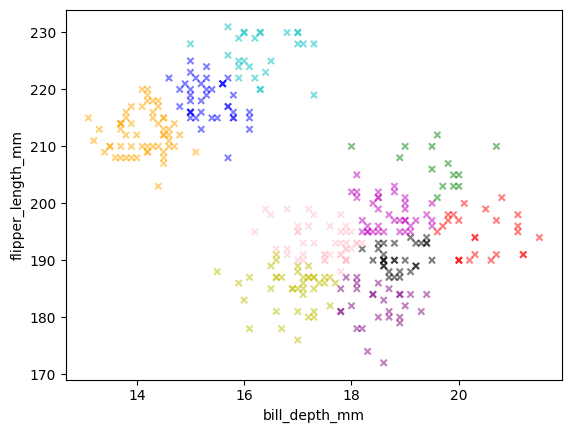

In [15]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y",
    3: "g",
    4: "c",
    5: "m",
    6: "k",
    7: "orange",
    8: "purple",
    9: "pink"
})

# Plot the data
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, marker="x", alpha=.5)

We can call .predict() to get the cluster assignment for a new observation. For example, consider a penguin with a bill depth of 15 mm and a flipper length of 210 mm. Visually, it's obvious which cluster this penguin should be assigned to. Let's check that this penguin is indeed assigned to that cluster.

In [16]:
pipeline.predict([[15, 210]])
# The given observation [15, 210] has been assigned to cluster 0 by the KMeans model.

/opt/anaconda3/envs/ds-course/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([7], dtype=int32)

Note that .predict() simply assigns the test observation to the nearest cluster without recalculating the centroids. (If this observation had been in the training data, then assigning it to a cluster would move the centroid, which in turn would change the assignment of the other points to clusters, and so on.)

### Application of Clustering

- **Ecology:** An ecologist wants to group organisms into types.
- **Market Segmentation:** A business wants to group their customers into types.
- **Language:** A linguist might want to identify different uses of ambigupus words like "set" or "run".